In [74]:
import numpy as np
import pandas as pd

In [75]:
df=pd.read_csv("Airline_Delay_Cause.csv")


In [76]:
df.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

In [77]:
df=df.dropna(subset=["arr_delay"])
df["Delayed"]= df["arr_delay"].apply(lambda i: 1 if i>15 else 0 )

In [78]:
df.drop(["arr_delay"],axis=1,inplace=True)

In [79]:
df.drop([
      'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
   'arr_cancelled', 'arr_diverted', 'arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
     'late_aircraft_ct', 'carrier_name', 'airport_name'],axis=1,inplace=True)

In [80]:
df.dtypes

year           int64
month          int64
carrier       object
airport       object
arr_del15    float64
Delayed        int64
dtype: object

In [81]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df["carrier"] = le.fit_transform(df["carrier"])

df["airport"] = le.fit_transform(df["airport"])

In [82]:
df.dtypes

year           int64
month          int64
carrier        int64
airport        int64
arr_del15    float64
Delayed        int64
dtype: object

In [83]:
important_features = ["carrier", "airport", "arr_del15"]

X = df[important_features]

y = df["Delayed"]


In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)


In [86]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.9978708510762411

In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred,y_test)

array([[ 1327,    18],
       [   55, 32886]])

In [88]:
from sklearn.metrics import recall_score

recall_score(y_pred,y_test)

0.9983303481982939

In [89]:
from sklearn.metrics import f1_score

f1_score(y_pred,y_test)

0.9988913357126585

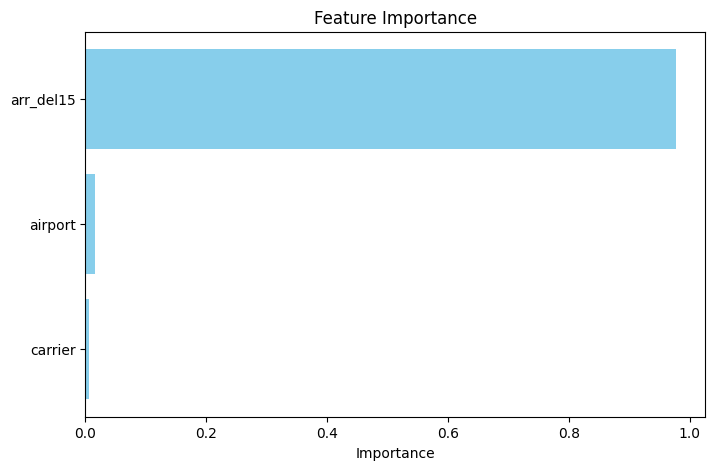

In [90]:
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': important_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)  # ascending for horizontal bar chart

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()